In [1]:
import pandas as pd
from Progenesis import ProgenesisData, MergedProgenesisData
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import warnings

# Load individual Progenesis export
When loading a Progenesis export, a few methods will be called automatically. For example, when annotated features have the same 'Accepted Description' we merge these features together and remove the original features. 

In [ ]:
ProData = ProgenesisData('Data/Pos/181210_UMETA_POS.csv',mode='pos')

In [ ]:
ProData.data.head()

In [ ]:
ProData.data.tail()

# Merge (5) batches 
The first agument of 'MergedProgenesisData' is a list of paths to the Progenesis exports which need to be merged. The first export is the reference batchs. Automatically, retention times will be corrected between the reference batch and the batch being merged. Merging batches is done on 4 levels:

1) Annotated features with the same name ('Accepted Description') will be pooled to the merged dataset

2) On MS/MS similarity score, retention time, neutral mass or m/z-value, median abundancy difference and isotope-pattern.

3) On retention time, neutral mass, median abundancy difference and isotope-pattern. 

4) On retention time, m/z-value, median abundancy difference and isotope-pattern

<br><br>
**Make sure if you use your own data that naming the files is according to**:
* '_UMETA_' must be in de file name 
* The filename of the MSMS-file (.msp) must be exactly the same but '_UMETA_' must be replaced by '_MS2_'



In [ ]:
# This might take some time

with warnings.catch_warnings():
    MergProData = MergedProgenesisData([ 'Data/Pos/190308_UMETA_POS.csv',
                                         'Data/Pos/190315_UMETA_POS.csv',
                                         'Data/Pos/190218_UMETA_POS.csv',
                                         'Data/Pos/181210_UMETA_POS.csv',
                                         'Data/Pos/181214_UMETA_POS.csv',
                                        ],  mode='pos',
                                       
                                      
                                      
                                      )

In [51]:
# Show merged data
# The Retention time (min) is the retention time of the reference batch
MergProData.data.iloc[0:10]

Accepted Description,cis-Aconitic acid / trans-Aconitic acid,"2,5-Furandicarboxylic acid",Citric acid*,2-Aminoadipic acid,S-Sulphocysteine,Phenylalanine,Indole,Tryptophan,Aspartic acid,(allo)Isoleucine,...,382.055,148.11606,568.53787,136.03932,96.15701,408.27877,671.32935,670.99502,568.78852,93.06675*
m/z,175.024,139.003,215.016,144.065,201.984,166.086,159.092,205.097,134.045,132.102,...,382.055,148.116,568.538,136.039,96.157,408.279,671.329,670.995,568.789,93.0667
Retention time (min),1.09388,1.52185,1.52185,0.9309,0.864983,3.58842,4.31773,4.31773,0.817517,1.80217,...,0.883917,0.73295,4.7442,4.52927,1.76447,9.95347,5.66265,5.66265,4.7442,3.5697
Isotope Distribution,100 - 0.98,100 - 6.44 - 0.817,100 - 6.82 - 1.41,100 - 1.3,100 - 1.33 - 0.781 - 0.181,100 - 0.523 - 0.0188,100 - 2.97,100 - 0.564 - 0.0873,100 - 1.54,100 - 0.427 - 0.00846,...,100 - 7.38,100,100 - 85 - 11,100,100,100 - 21.9,100 - 6.68,100 - 28.3,100 - 29.7 - 2.07,100 - 0.903
Accepted Compound ID,UMETA00141,UMETA00706,UMETA00143,UMETA00001,UMETA00071,UMETA00056,UMETA00040,UMETA00074,UMETA00015,UMETA00008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neutral mass (Da),174.016,156.006,192.027,NaN,200.977,165.079,117.058,204.09,NaN,131.095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compound,1.09_174.0164n,1.52_156.0058n,"1.52_192.0269n,1.52_230.9899m/z*",0.93_144.0655m/z,0.86_200.9765n,3.59_165.0789n,4.32_117.0578n,4.32_204.0898n,"0.82_134.0447m/z,0.81_156.0266m/z*",1.80_131.0946n,...,0.88_382.0550m/z,0.73_148.1161m/z,4.74_568.5379m/z,4.53_136.0393m/z,1.76_96.1570m/z,9.95_408.2788m/z,5.66_671.3293m/z,5.66_670.9950m/z,4.74_568.7885m/z,3.57_93.0667m/z
Adducts,"M+H-H2O, M+H","M+H-H2O, M+H","M+H-H2O, M+H, M+Na, 2M+Na,M+K*",M+H-H2O,"M+H, M+Na","M+H-H2O, M-NH3+H, M+H, M+Na, M+K","M-e, M+H, M+ACN+H","M-NH3+H, M+H, M+Na, M+K, 2M+H, 2M+Na","M+H,M+Na*","M+H, M+Na",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190315_Recipe_LOT543_8*,3917.62,882963,1.6922e+06,35194.7,189612,2.24182e+06,27520.7,1.76781e+06,7039.25,885047,...,22.5241,1405.49,94.5257,174.941,66.192,101.994,221.239,74.1336,83.0847,205.938
sample_107***,270.683,5754.33,23139.7,8080.85,5.95736,612200,32696.9,661355,2060.14,282975,...,1692.66,1136.48,12816.2,169.112,142.137,6316.23,12232,12444.1,10037.5,288.44
sample_256**,498.315,10662.4,67828.6,3905.21,317.109,547521,12049,822199,1697.39,188541,...,927.169,784.371,9174.6,116.215,47.6575,125.279,19282.5,19842.5,7189.47,148.177


# Heatmap of merged batches

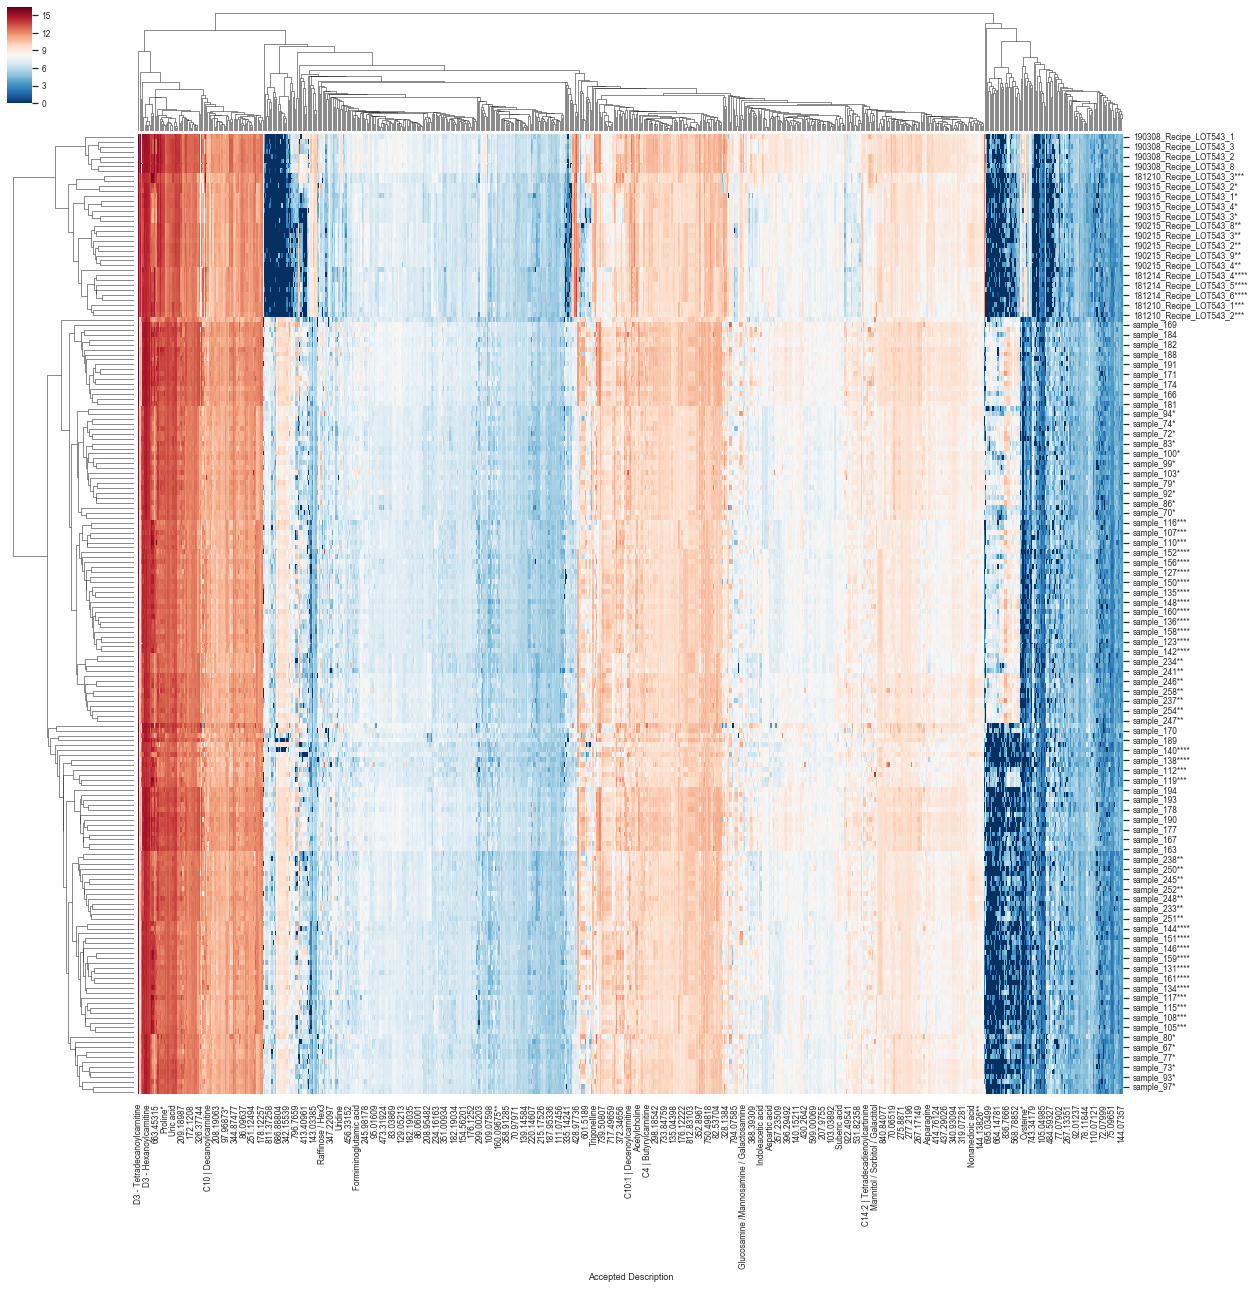

In [52]:
sns.set(font_scale=0.75)
sns.clustermap( MergProData.data.loc[ MergProData.all_IDs].fillna(0).apply(np.log1p), cmap='RdBu_r',figsize=(20,20) )

# Check matching features between Reference batch and other batches

In [53]:
# Check matching from matching also MSMS data
ind = 0 # if 0 it means the matching of the first other batch (not ref batch)
        # if 1, then you check the results from matching ref batch with second other batch etc.
MergProData.matches_from_msms[ind].drop(columns = ['Compound_x','Compound_y']).head()

,Compound_1,Compound_2,RT_1,RT_2,columns_1,columns_2,median_abun_1,median_abun_2,median_error,min_ppm_error_possible_nms_1,min_ppm_error_possible_nms_2,mz_1,mz_2,nm_1,nm_2,possible_nms_1,possible_nms_2,ppm_error_mz,ppm_error_nm,similarity_score
3,0.69_147.0112n,0.69_130.0079m/z,0.68615,0.69161,130.00792,130.00793*,11450.59144,5321.678503,54.0,NaN,0.150329,130.008,130.008,147.011,NaN,NaN,"[258.0012606, 236.0193606, 147.0112303, 129.00...",0.0792259,NaN,0.939691
4,0.69_175.0061n,0.69_158.0028m/z,0.68615,0.69161,158.00281,158.00282,40117.13450,19758.909780,51.0,NaN,0.106853,158.003,158.003,175.006,NaN,NaN,"[313.99103140000005, 292.0091314, 175.0061157,...",0.0436701,NaN,0.947116
6,9.08_519.3324n,9.11_520.3398m/z,9.07605,9.11738,520.33969,520.3398,346995.41900,282850.856100,18.0,NaN,0.169448,520.34,520.34,519.332,NaN,NaN,"[1038.665003, 1016.6831030000001, 537.3431015,...",0.214283,NaN,0.911150
7,9.65_186.9931n,9.64_188.0004m/z,9.65398,9.65413,188.0004,188.0004*,30688.52043,43780.968900,43.0,NaN,0.145460,188,188,186.993,NaN,NaN,"[373.9862016, 352.00430159999996, 205.0037008,...",0.0196808,NaN,0.982687
13,8.48_222.0890n,9.22_205.0858m/z,8.48427,9.22463,223.09629,205.08584,85147.64678,10359.272060,88.0,NaN,0.571843,223.096,205.086,222.089,NaN,NaN,"[408.15707960000003, 386.1751796, 222.0891398,...",80729.5,NaN,0.955926


In [54]:
# Check matching from annotated features
MergProData.matches_from_identifications[ind].head()

,columns_1,RT_1,mz_1,nm_1,IsDi_1,Adducts_1,Compound_1,column_stripped,columns_2,RT_2,mz_2,nm_2,IsDi_2,Adducts_2,Compound_2,median_abun_1,median_abun_2,median_error
0,cis-Aconitic acid / trans-Aconitic acid,1.09388,175.024,174.016,100 - 0.98,"M+H-H2O, M+H",1.09_174.0164n,cis-aconitic acid / trans-aconitic acid,cis-Aconitic acid / trans-Aconitic acid,1.08848,157.013,NaN,100 - 3.15,M+H-H2O,1.08_157.0131m/z,915.821699,586.375260,36.0
1,Carnosine,0.808117,227.114,NaN,100 - 7.53,M+H,0.81_227.1136m/z,carnosine,Carnosine,0.815746,249.095,NaN,100 - 4.92,M+Na,0.81_249.0954m/z,1721.344223,23.432047,99.0
2,"2,5-Furandicarboxylic acid",1.52185,139.003,156.006,100 - 6.44 - 0.817,"M+H-H2O, M+H",1.52_156.0058n,"2,5-furandicarboxylic acid","2,5-Furandicarboxylic acid",1.52356,139.003,156.006,100 - 6.41 - 0.639,"M+H-H2O, M+H",1.51_156.0059n,18037.541030,13548.994320,25.0
3,Citric acid*,1.52185,215.016,192.027,100 - 6.82 - 1.41,"M+H-H2O, M+H, M+Na, 2M+Na,M+K*","1.52_192.0269n,1.52_230.9899m/z*",citric acid,Citric acid,1.51331,215.016,NaN,100 - 6.42 - 1.65,"M+Na,M+H-H2O, M+H, M+K, 2M+Na*","1.50_215.0161m/z,1.51_192.0270n*",97903.375962,45612.182280,53.0
4,2-Aminoadipic acid,0.9309,144.065,NaN,100 - 1.3,M+H-H2O,0.93_144.0655m/z,2-aminoadipic acid,2-Aminoadipic acid,0.922427,162.076,161.069,100 - 3.7,"M+H-H2O, M+H, M+ACN+H",0.92_161.0688n,2587.919089,7403.212051,186.0


In [55]:
# Check matching from neutral matches
MergProData.matches_from_nm[ind].head()

,columns_1,columns_2,Compound_1,Compound_2,RT_1,RT_2,nm_1,nm_2,IsDi_1,IsDi_2,ppm_error_nm,Adducts_1,Adducts_2,IsDi_errors,median_abun_1,median_abun_2,median_error
0,172.97436,172.9744,1.56_189.9777n,1.54_189.9777n,1.56105,1.55431,189.978,189.978,100 - 3.46 - 5.08 - 5.12,100 - 4.1,0.208972,"M+H-H2O, M+H","M+H-H2O, M+H","[0.0, 7.57, 50.4, 50.59]",809.856749,220.153563,73.0
1,413.26556,391.28366,9.99_390.2763n,9.98_390.2764n,9.99203,9.98998,390.276,390.276,100 - 27.7 - 1.62 - 0.0617,100 - 23.1 - 0.43 - 0.0163,0.112741,"M+Na, M+K, 2M+Na","M+H, M+Na, M+K, 2M+Na","[0.0, 14.07, 17.98, 0.9]",60543.855630,39311.334300,35.0
2,393.29027,393.29008,9.99_392.2830n,9.98_392.2828n,9.99203,9.98998,392.283,392.283,100 - 9.88 - 0.174,100 - 7.73 - 0.0438,0.46701,"M+H, M+Na","M+H, M+Na","[0.0, 14.45, 2.52]",2871.437845,599.365129,79.0
8,440.98033,440.9804,1.52_439.9733n,1.51_439.9733n,1.52185,1.52356,439.973,439.973,100 - 11.9 - 1.33,100 - 11.7 - 0.905,0.0327293,"M+H, M+2H","M+H, M+2H","[0.0, 1.18, 6.71]",1281.659740,1048.385803,18.0
11,437.9722,437.97227,1.52_437.9727n,1.51_437.9728n,1.52185,1.52356,437.973,437.973,100 - 10 - 2.32,100 - 11 - 2.03,0.169417,"M-e, M+H","M-e, M+H","[0.0, 6.67, 3.96]",10977.897290,8381.476020,24.0


In [56]:
# Check matching from mz matches
MergProData.matches_from_nm[ind].head()

,columns_1,columns_2,Compound_1,Compound_2,RT_1,RT_2,nm_1,nm_2,IsDi_1,IsDi_2,ppm_error_nm,Adducts_1,Adducts_2,IsDi_errors,median_abun_1,median_abun_2,median_error
0,172.97436,172.9744,1.56_189.9777n,1.54_189.9777n,1.56105,1.55431,189.978,189.978,100 - 3.46 - 5.08 - 5.12,100 - 4.1,0.208972,"M+H-H2O, M+H","M+H-H2O, M+H","[0.0, 7.57, 50.4, 50.59]",809.856749,220.153563,73.0
1,413.26556,391.28366,9.99_390.2763n,9.98_390.2764n,9.99203,9.98998,390.276,390.276,100 - 27.7 - 1.62 - 0.0617,100 - 23.1 - 0.43 - 0.0163,0.112741,"M+Na, M+K, 2M+Na","M+H, M+Na, M+K, 2M+Na","[0.0, 14.07, 17.98, 0.9]",60543.855630,39311.334300,35.0
2,393.29027,393.29008,9.99_392.2830n,9.98_392.2828n,9.99203,9.98998,392.283,392.283,100 - 9.88 - 0.174,100 - 7.73 - 0.0438,0.46701,"M+H, M+Na","M+H, M+Na","[0.0, 14.45, 2.52]",2871.437845,599.365129,79.0
8,440.98033,440.9804,1.52_439.9733n,1.51_439.9733n,1.52185,1.52356,439.973,439.973,100 - 11.9 - 1.33,100 - 11.7 - 0.905,0.0327293,"M+H, M+2H","M+H, M+2H","[0.0, 1.18, 6.71]",1281.659740,1048.385803,18.0
11,437.9722,437.97227,1.52_437.9727n,1.51_437.9728n,1.52185,1.52356,437.973,437.973,100 - 10 - 2.32,100 - 11 - 2.03,0.169417,"M-e, M+H","M-e, M+H","[0.0, 6.67, 3.96]",10977.897290,8381.476020,24.0


# Normalize data

In [57]:
from Metchalizer import NormMetchalizer, NormPQN , NormBestCorrIS, NormMetchalizerLog, NormAnchor, LR_age_sex

In [58]:
merged_data = MergProData.data.loc[MergProData.all_IDs].apply(np.float64)

# Rename the internal standards for using normalization method(s)
# We need to 'tag' the internal standards such that the normalization methods knowns
# which feature is a internal standard.
rename_IS = {
             "1,3 -[15]N Uracil*": "IS_0",
             "5 - [79]Bromotryptophan": "IS_1",
             "D10 - Isoleucine": "IS_2",
             "D3 - Carnitine": "IS_3",
             "D4 - Tyrosine": "IS_4",
             "D5 - Phenylalanine": "IS_5",
             "D6 - Ornithine": "IS_6",
             "Dimethyl - 3,3 - glutaric acid": "IS_7",
             "[13]C - Thymidine ": "IS_8",
            }
# merged_data[list(rename_IS.keys())]

# Rename
merged_data = merged_data.rename(columns = rename_IS)

# Here the amount of stars in the sample ID indicate the batch 
batch_with_IDs = defaultdict(list)
for ID in merged_data.index:
    batch_with_IDs['batch_'+str(ID.count('*') )].append(ID)

In [59]:
# merged_data = merged_data.iloc[:,0:200]

### Choose normalization method

In [70]:
normalizer = NormMetchalizer(merged_data, batch_with_IDs, prefix_IS= 'IS_', prefix_QC_samples = 'Recipe_', 
                             remove_outliers_Z_threshold = 3, interia_per_threshold=75, lambda_1 = 0.5, lambda_2 = 1)

normalizer_2 = NormAnchor(merged_data, dict(batch_with_IDs), tag_QC='Recipe')



# normalizer = NormMetchalizerLog(merged_data, batch_with_IDs, prefix_IS= 'IS_', prefix_QC_samples = 'Recipe_', 
#                              remove_outliers_Z_threshold = 5, interia_per_threshold=75)
# normalizer = NormPQN(merged_data)
# normalizer = NormBestCorrIS(merged_data,batch_with_IDs)

Total amount of standards: 9
Total amount of Anchor samples: 37


In [72]:
# First normalization 
with warnings.catch_warnings():
    normalizer.normalize()

K(0) = 0.0
K(1) = 321.0
K(2) = 339.0
K(3) = 363.0
K(4) = 386.0
K(5) = 399.0
K(6) = 401.0
K(7) = 407.0
K(8) = 412.0
2 LVs are taken.
Batch correction  0/786 cis-Aconitic acid / trans-Aconitic acid
Batch correction  1/786 2,5-Furandicarboxylic acid
Batch correction  2/786 Citric acid*
Batch correction  3/786 2-Aminoadipic acid
Batch correction  4/786 S-Sulphocysteine
Batch correction  5/786 Phenylalanine
Batch correction  6/786 Indole
Batch correction  7/786 Tryptophan
Batch correction  8/786 Aspartic acid
Batch correction  9/786 (allo)Isoleucine
Batch correction  10/786 D2 - Uridine
Batch correction  11/786 Cysteine*
Batch correction  12/786 Hypoxanthine
Batch correction  13/786 Asparagine
Batch correction  14/786 Trigonelline
Batch correction  15/786 Ornithine
Batch correction  16/786 Glucosamine /Mannosamine / Galactosamine
Batch correction  17/786 Uridine
Batch correction  18/786 IS_3
Batch correction  19/786 Tyrosine
Batch correction  20/786 Fructose / Hexose / myo-Inositol
Batch co

Batch correction  190/786 414.76124
Batch correction  191/786 106.95049
Batch correction  192/786 352.8967
Batch correction  193/786 392.74812
Batch correction  194/786 203.12773
Batch correction  195/786 696.43658
Batch correction  196/786 652.41099
Batch correction  197/786 84.04439
Batch correction  198/786 737.28485
Batch correction  199/786 206.08109
Batch correction  200/786 115.07535
Batch correction  201/786 447.34649
Batch correction  202/786 213.14605
Batch correction  203/786 149.13245
Batch correction  204/786 178.12257
Batch correction  205/786 282.11777
Batch correction  206/786 663.45315
Batch correction  207/786 125.10729
Batch correction  208/786 197.15359
Batch correction  209/786 209.05558
Batch correction  210/786 169.12227
Batch correction  211/786 149.02329
Batch correction  212/786 119.12875*
Batch correction  213/786 113.03446
Batch correction  214/786 215.12759
Batch correction  215/786 275.8871
Batch correction  216/786 285.00503
Batch correction  217/786 130.

Batch correction  417/786 569.36895
Batch correction  418/786 208.95482
Batch correction  419/786 357.23509
Batch correction  420/786 145.10113
Batch correction  421/786 272.94387
Batch correction  422/786 116.10695
Batch correction  423/786 950.22176
Batch correction  424/786 393.26398
Batch correction  425/786 263.00777
Batch correction  426/786 416.24845
Batch correction  427/786 488.3943
Batch correction  428/786 90.09131
Batch correction  429/786 245.98178
Batch correction  430/786 496.42048
Batch correction  431/786 612.88039
Batch correction  432/786 281.04102
Batch correction  433/786 349.09835
Batch correction  434/786 86.0953
Batch correction  435/786 319.16057
Batch correction  436/786 340.93094
Batch correction  437/786 159.14916
Batch correction  438/786 334.13906
Batch correction  439/786 613.39467
Batch correction  440/786 829.82142
Batch correction  441/786 846.82345
Batch correction  442/786 Cortisol
Batch correction  443/786 134.10041
Batch correction  444/786 181.085

Batch correction  632/786 473.31924
Batch correction  633/786 793.74157
Batch correction  634/786 590.29605
Batch correction  635/786 213.15963
Batch correction  636/786 215.17526
Batch correction  637/786 182.19034
Batch correction  638/786 378.23971
Batch correction  639/786 78.11844
Batch correction  640/786 72.07999
Batch correction  641/786 546.35564
Batch correction  642/786 836.7666
Batch correction  643/786 231.17817
Batch correction  644/786 139.14584
Batch correction  645/786 572.03329
Batch correction  646/786 337.1711
Batch correction  647/786 197.15766
Batch correction  648/786 83.54043
Batch correction  649/786 595.55868
Batch correction  650/786 216.10173
Batch correction  651/786 404.20607
Batch correction  652/786 194.95957
Batch correction  653/786 757.71366
Batch correction  654/786 92.01237
Batch correction  655/786 175.11574
Singular matrix We take all samples for this feature (no outlier removal)
Cannot fit the model on this feature!
Batch correction  656/786 219.

In [74]:
# Second normalization 
with warnings.catch_warnings():
    normalizer_2.normalize()

Done with normalization


# PCA on batches

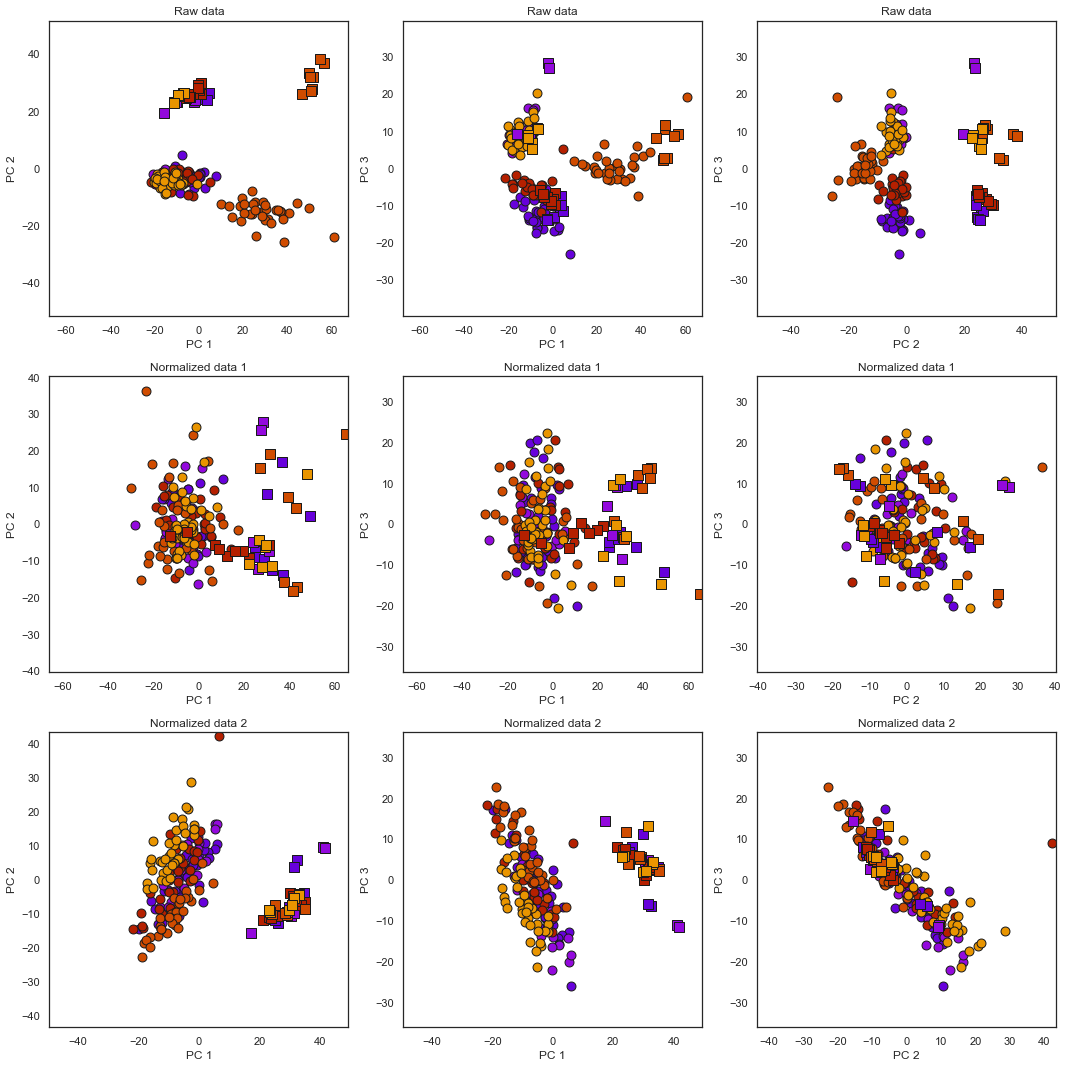

In [75]:
from matplotlib.colors import LinearSegmentedColormap
from sklearn.decomposition import PCA

sns.set(context='notebook', style='white',font_scale=1)
colors = sns.color_palette('gnuplot',5)

QC_IDs = [ID for ID in merged_data.index if 'Recipe_' in ID]

dims = [(0,1),(0,2),(1,2) ]
marker_size = 80

perc = 1 # percentile for determining x,y limits in plot
range_scale = 1.8 # Zoom factor w.r.t x,y limits determined from percentiles

fig = plt.figure(figsize=(len(dims)*5,15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i,(title, data) in enumerate(zip(['Raw data','Normalized data 1','Normalized data 2'],
                                     [ merged_data, normalizer.data_normalized, normalizer_2.data_normalized  ])):
    data_norm_scaled = ( data - data.median() ) / data.mad() 
    tranformer = PCA(n_components=10)
    X_PCA = tranformer.fit_transform(data_norm_scaled.values )
    
    # Plot PCA with outliers
    for j,dim in enumerate(dims):
        ax = fig.add_subplot(3,len(dims),len(dims)*i+(j+1)  )
        for k,(batch,IDs) in enumerate( batch_with_IDs.items() ):
            x = data.index.isin( batch_with_IDs[batch]  )
            color_k = colors[k] 
            ax.scatter(X_PCA[x,dim[0]],X_PCA[x,dim[1]],color=color_k ,alpha=1,linewidths=1,edgecolor='k',s=marker_size )

        for k,(batch,IDs) in enumerate( batch_with_IDs.items() ):
            x = (data.index.isin( batch_with_IDs[batch] )) & ( data.index.isin(QC_IDs))
            color_k = colors[k] 
            ax.scatter(X_PCA[x,dim[0]],
                       X_PCA[x,dim[1]],
                       color=color_k, s=marker_size*1.2, marker='s',alpha=1 ,linewidth=1,edgecolor='k')

            
        x_low,x_high =  np.percentile(X_PCA[:,dim[0]],perc) * range_scale,   np.percentile(X_PCA[:,dim[0]],100-perc)*range_scale
        y_low,y_high =  np.percentile(X_PCA[:,dim[1]],perc) * range_scale,   np.percentile(X_PCA[:,dim[1]],100-perc)*range_scale
        x_width = (x_high - x_low)/2
        y_width = (y_high - y_low)/2
  
        ax.set_xlim([ -x_width, x_width])
        ax.set_ylim([ -y_width, y_width])

        ax.set_xlabel('PC '+str(dim[0]+1))
        ax.set_ylabel( 'PC '+str(dim[1]+1) )
        ax.set_title(title)

    fig.tight_layout()

# Evaluation of batch effect removal

We evaluated batch effect removal by determining the ratio in the QC samples:

$ WTR= \frac{\sigma^2_{within}}{\sigma^2_{tot}} = \frac{\sigma^2_{tot} - \sigma^2_{between}}{\sigma^2_{tot}}$



Normalization should not remove metabolic differences in the data. This can be observed by looking at how ranks are changed within the QC samples after normalization. Here 'rank' is an order number of the metabolite/feature after sorting the features on abundancy.

$ \Delta R_j =  \left | \bar{R}^{\text{raw}}_j - \bar{R}^{\text{normalized}}_j \right |   $

with $ \bar{R}^{\text{x}}_j $ being the average rank from all QC samples for metabolite $j$.  Lower numbers of  $\Delta R_j$ indicated better performances for normalization since ranks were conserved.


### Determine WTR scores from QC samples

In [76]:
WTR = []
for name_data,data in zip(['Raw','Normalized','Normalized 2'],
                          [normalizer.data, normalizer.data_normalized,normalizer_2.data_normalized ]):
    for metab in data.columns:   
        metab_means_per_batch = []
        x_metab_all = []
        for k,(batch,IDs) in enumerate( batch_with_IDs.items() ):
            IDs_QC = [ID for ID in IDs if 'recipe' in ID.lower()]
            
            x_metab = data.loc[IDs_QC, metab]
            x_metab_all.extend( x_metab.tolist() )
            
            metab_means_per_batch.append(x_metab.mean())

        std_between = np.var( metab_means_per_batch )
        std_total = np.var(x_metab_all)
        WTR.append([name_data,metab,(std_total - std_between)/std_total])

WTR = pd.DataFrame(WTR,columns = ['method','Metab','WTR'] )

### Rank differences from QC samples

In [77]:
ranks = []

for name_data,data in zip(['Raw','Normalized','Normalized 2'],
                          [normalizer.data, normalizer.data_normalized,normalizer_2.data_normalized ]):
    # Get all QC samples in data
    IDs_QC = [ID for ID in data.index if 'recipe' in ID.lower()]
    data_QC = data.loc[IDs_QC]

    df_ = pd.DataFrame([])
    for ID,row in data_QC.iterrows():
        ind  = row.sort_values(ascending=False).index
        row_ = pd.Series([i for i in range(len(ind))], index= ind)
        row_.name = ID
        df_ = df_.append( row_,ignore_index=False )

    mean_ranks = df_.mean(axis=0)
    mean_ranks.name = name_data
    ranks.append(mean_ranks)
    
ranks = pd.DataFrame(ranks)
delta_R = (ranks - ranks.loc['Raw']).abs() 
Delta_R = pd.DataFrame([])

for i,row in delta_R.iterrows():
    row_ = row.reset_index()
    row_.columns = ['Metab','Rank_diff']
    row_ = row_.assign(method = row.name)
    Delta_R= pd.concat([Delta_R, row_ ])


## Plot WTR-scores and Rank differences
Note, that WTR-scores and $\Delta R$'s for Anchor (when using the QC samples) are not representative for normalization performance. 

Text(0.5, 0, '')

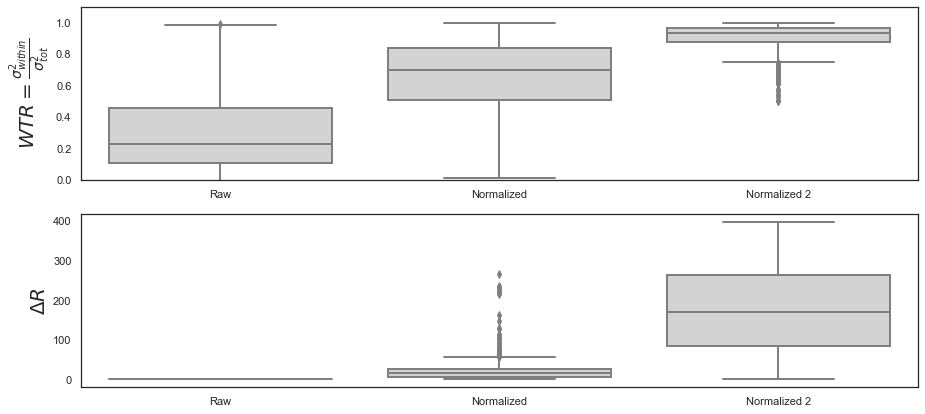

In [78]:
fig = plt.figure(figsize = (15,7))
sns.set(font_scale=1, style='white')
ax = fig.add_subplot( 2,1,1)
g = sns.boxplot( data= WTR,x= 'method',y='WTR' ,ax= ax, color='lightgrey',linewidth=2)
ax.set_ylabel(r'$ WTR = \frac{\sigma^2_{within}}{\sigma^2_{tot}}$',fontsize=20)
ax.set_xlabel('')
ax.set_ylim([0,1.1])


ax = fig.add_subplot( 2,1,2)
g = sns.boxplot( data= Delta_R,x= 'method',y='Rank_diff' ,ax= ax, color='lightgrey',linewidth=2)
ax.set_ylabel(r'$\Delta R$',fontsize=20)
ax.set_xlabel('')



# Regression model

In [79]:
metadata_samples = pd.read_csv('Data/Sample_metadata.csv').drop(columns = ['Unnamed: 0'])
norm_data = normalizer.data_normalized
metadata_samples = metadata_samples.assign(ID_in_data =  metadata_samples['ID'].map( { ID.strip('*'): ID for ID in norm_data.index } ) ).dropna()

age_sex_of_samples = metadata_samples.set_index('ID_in_data')[['Age_in_days','Sex']]
age_sex_of_samples['Sex'] = age_sex_of_samples['Sex'].apply(lambda x: 1 if x.lower() == 'v' else 0)

In [82]:
# Fit model
metabolite = norm_data.columns.tolist()[80]

model = LR_age_sex(a=1,b=1) 
model = LR_age_sex(polynomials = 3, a = 365, b= 1, Z_outlier_threshold=4)
X = age_sex_of_samples
y = data_norm.loc[age_sex_of_samples.index, metabolite]
model.fit(X , y ,interaction=True) # interaction sex*age can be False or True. Offset in sex cannot be altered


Text(0.5, 0, 'Age')

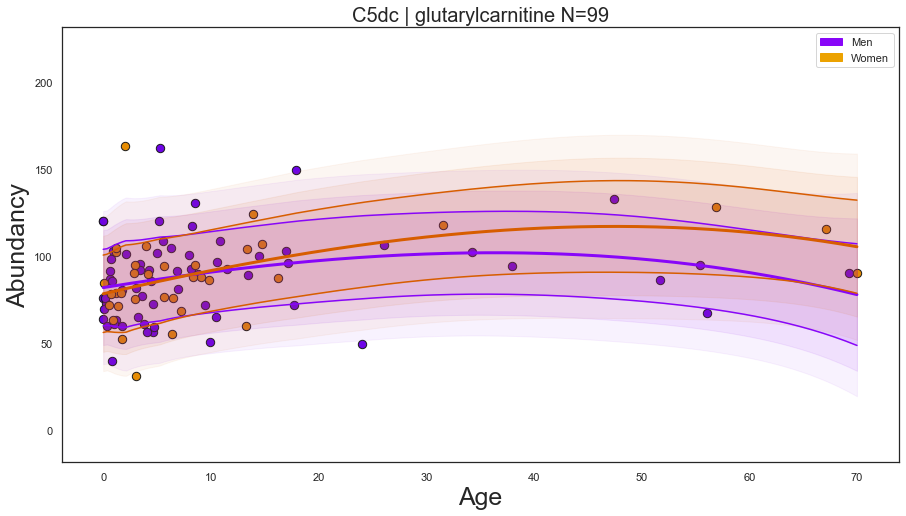

In [83]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
factor_age = 1/365 # The model uses age in days. For plotting we want years
scaling = 1 # Determines ylimits 


colors = sns.color_palette('gnuplot',10)
for col,(sex,data_gb) in zip([colors[1],colors[-2]],X.groupby('Sex')):
    ax.scatter( data_gb['Age_in_days']*factor_age, y.loc[data_gb.index],
               alpha=0.99,color= col,s=70,linewidth=1, edgecolor='k')

    
res = model.predict(X)
res.index= X.index
res = res.assign(y = y )

y_fit,y_std = res['y_pred'],res['std_pred']
ax.set_ylim([ np.percentile(y_fit,5) * (1-scaling), np.percentile(y_fit,95) *(1+scaling)] )

colors = sns.color_palette('gnuplot',6)
amount= 200
new_legend = []
for col, women_men in zip([colors[1],colors[-2]],[0,1] ):
    X_fit = pd.DataFrame( [np.linspace(X['Age_in_days'].min(),X['Age_in_days'].max(),amount),np.ones(amount)*women_men ]).T
    X_fit.columns = ['Age_in_days','Sex']

    res_ = model.predict(X_fit)

    y_fit,y_std = res_['y_pred'],res_['std_pred']

    ind = np.argsort( X_fit['Age_in_days'] )
    ax.plot( X_fit['Age_in_days'].iloc[ind]*factor_age, y_fit.iloc[ind],c=col,linewidth=3, label=str(women_men))
    ax.plot( X_fit['Age_in_days'].iloc[ind]*factor_age, (y_fit- y_std).iloc[ind],c=col)
    ax.plot( X_fit['Age_in_days'].iloc[ind]*factor_age, (y_fit+ y_std).iloc[ind],c=col)
    intervals = np.linspace(1,2,3)
    for u in intervals:
        ax.fill_between( X_fit['Age_in_days'].iloc[ind]*factor_age, 
                         (y_fit- y_std*u).iloc[ind],
                         (y_fit+ y_std*u).iloc[ind],alpha=0.15 - np.diff(intervals)[0]*u/10,color=col)



patch_men = mpatches.Patch(color=colors[1], label='Men')
patch_women = mpatches.Patch(color=colors[-1], label='Women')
ax.legend(handles=[patch_men,patch_women])

ax.set_ylim([ (y_fit - 5*y_std).mean() , (y_fit + 5*y_std).mean() ])
ax.set_title(metabolite.lower().capitalize()+' '+'N='+str(len(model.not_outlier_IDs)),fontsize=20)
ax.set_ylabel('Abundancy',fontsize=25)
ax.set_xlabel('Age',fontsize=25)

## Obtain significance of regression coefficients

In [84]:
model.p_values(n_bootstraps=50,train_size=0.95)

In [85]:
model.p_vals_fits.head()

,0,1,2,3,Sex,interaction
0,5.397850e-71,0.377438,0.921508,0.770777,0.726157,0.181889
1,1.644424e-65,0.261073,0.736912,0.979820,0.622994,0.389807
2,8.748791e-65,0.366376,0.942291,0.741839,0.484595,0.171976
3,2.497130e-66,0.169269,0.547505,0.850327,0.658093,0.313878
4,5.231286e-69,0.378858,0.894600,0.800170,0.480891,0.154073


Text(0, 0.5, 'P-values from bootstraps')

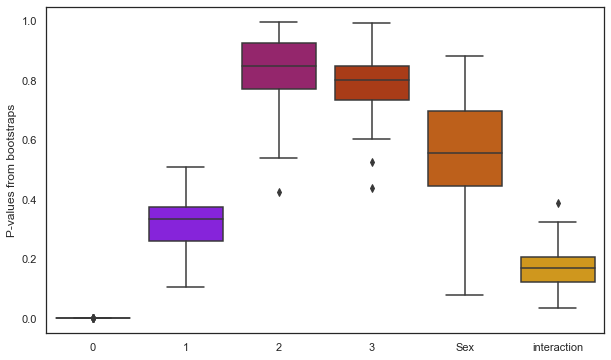

In [86]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
sns.boxplot( data = model.p_vals_fits, palette='gnuplot' ,ax=ax)
ax.set_ylabel('P-values from bootstraps')